# SSN Card Image Generator

## Import Libraries

In [1]:
import faker
import pandas as pd
import numpy as np
import random
import imgaug as ia
from imgaug import augmenters as iaa
from PIL import Image, ImageDraw, ImageFont
import PIL
from imagesoup import ImageSoup
from six.moves.urllib.parse import urlparse
from tqdm import tqdm_notebook
import os
import matplotlib.pyplot as plt

from joblib import Parallel, delayed
import multiprocessing

%matplotlib inline

## Generate Fake Data

In [2]:
fake = faker.Faker(locale='en_US')

In [3]:
df = pd.DataFrame(columns=["Name", "SSN"])

In [4]:
fake.seed_instance(1)
for i in tqdm_notebook(range(5000)):
    df = df.append({'Name': fake.name(), "SSN": fake.ssn()}, ignore_index=True)

In [5]:
df.shape

(5000, 2)

In [6]:
df.head()

Name          SSN
0    Ryan Gallagher  262-16-8118
1      Kaitlyn Gray  215-13-7994
2  Russell Reynolds  781-99-0035
3      Deborah Pham  606-14-5201
4  Alexander Weaver  391-88-3549

In [7]:
soup = ImageSoup()

In [8]:
images = soup.search('background images', n_images=300, image_size='medium')

In [ ]:
for img in tqdm.tqdm(images):
    filename=os.path.basename(urlparse(img.URL).path)
    if not os.path.isfile('background/{}'.format(filename)) and not os.path.isfile('background_test/trash/{}'.format(filename)):
        try:
            img.to_file('background_test/{}'.format(filename))
        except Exception as e:
            print(e)

## SSN template

In [9]:
fonts = {
    "Alfabetizaci¢n.otf":{
        "size":115,
        "x":310,
        "y":410
    },
    "blackjack.otf":{
        "size":75,
        "x":300,
        "y":430
    },
    "Biloxi Script.ttf":{
        "size":70,
        "x":290,
        "y":430
    },
    "Bite Chocolate Personal Use.ttf":{
        "size":40,
        "x":290,
        "y":450
    },
    "daniel.ttf":{
        "size":50,
        "x":290,
        "y":450
    },
    "Easy November.ttf":{
        "size":70,
        "x":290,
        "y":440
    },
    "Great Day Personal Use.ttf":{
        "size":60,
        "x":280,
        "y":440
    },
    "mathilde.otf":{
        "size":100,
        "x":290,
        "y":430
    },
    "Moving Skate.ttf":{
        "size":100,
        "x":290,
        "y":415
    },
    "Stylish Calligraphy Demo.ttf":{
        "size":60,
        "x":290,
        "y":450
    },
    "Sweet Hipster.ttf":{
        "size":100,
        "x":290,
        "y":415
    }
}

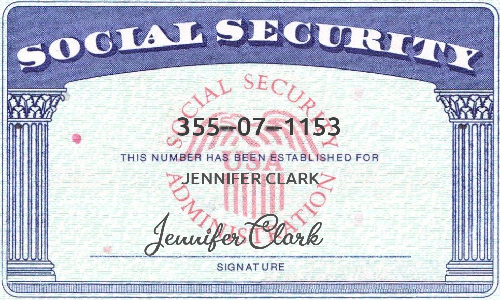

In [10]:
ssn_template = Image.open('ssn-card-template.jpg')
draw = ImageDraw.Draw(ssn_template)
fk = list(fonts.keys())[np.random.randint(1, len(fonts.keys()))]
f = fonts[fk]
ssn_font = ImageFont.truetype(font='/home/jarvis/Downloads/Ubuntu-Medium.ttf',size=50)
name_font = ImageFont.truetype(font='/home/jarvis/Downloads/Ubuntu-Medium.ttf',size=33)
sign_font = ImageFont.truetype(font='fonts/{}'.format(fk) ,size=f['size'])
name, ssn = df.sample(n=1).iloc[0]
draw.text((340,218), ssn.replace("-","--") , (60, 60, 60), font=ssn_font)
draw.text((350,330), name.upper(), (80, 80, 80), font=name_font)
draw.text((f['x'],f['y']), name.replace(" ",""), (80, 80, 80), font=sign_font)
imw = 500
imh = 300
ssn_template = ssn_template.resize((imw, imh))
ssn_template

## Only Cards

In [11]:
def gen_image(row):
    ssn_template = Image.open('ssn-card-template.jpg')
    draw = ImageDraw.Draw(ssn_template)
    fk = list(fonts.keys())[np.random.randint(1, len(fonts.keys()))]
    f = fonts[fk]
    sign_font = ImageFont.truetype(font='fonts/{}'.format(fk) ,size=f['size'])
    draw.text((340,218), row["SSN"].replace("-","--") , (60, 60, 60), font=ssn_font)
    draw.text((350,330), row["Name"].upper(), (80, 80, 80), font=name_font)
    draw.text((f['x'],f['y']), row["Name"].replace(" ",""), (80, 80, 80), font=sign_font)
    ssn_template = ssn_template.resize((imw, imh))
    
    ssn_template.convert('RGB').save('/newvolume/DATASETS/ssn_data/only_cards/{}.jpeg'.format(row['SSN']))

In [20]:
ssn_font = ImageFont.truetype(font='/home/jarvis/Downloads/Ubuntu-Medium.ttf',size=50)
name_font = ImageFont.truetype(font='/home/jarvis/Downloads/Ubuntu-Medium.ttf',size=32)
imw, imh = 500, 300
bw, bh = 1280,720
offset = ((bw - imw) // 2, (bh - imh) // 2)
_ = Parallel(n_jobs=multiprocessing.cpu_count(),verbose=1)(delayed(gen_image)(row) for _,row in df.iterrows())

[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1360 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 3360 tasks      | elapsed:   22.1s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:   34.0s finished


## Experimentation

photo-1508716880829-dd496b382c95.jpg


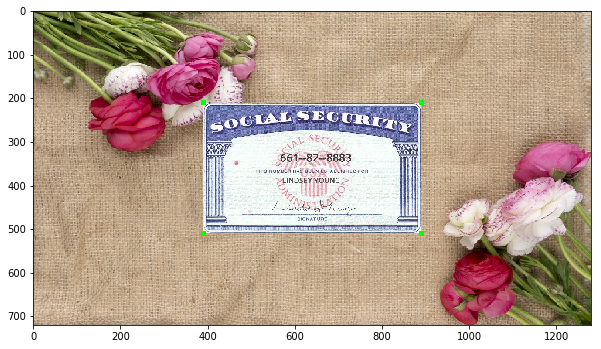

In [12]:
bw = 1280
bh = 720
background_fname = random.choice(os.listdir('background/'))
print(background_fname)
background_image = Image.open('background/{}'.format(background_fname))
background_image = background_image.resize((bw, bh))
offset = ((bw - imw) // 2, (bh - imh) // 2)
background_image.paste(ssn_template, offset)
draw = ImageDraw.Draw(background_image)
"""
r = 5
draw.ellipse(((offset[0]-r,offset[1]-r), (offset[0]+r, offset[1]+r)), fill='green')
draw.ellipse(((offset[0]+imw-r,offset[1]-r), (offset[0]+imw+r, offset[1]+r)), fill='green')
draw.ellipse(((offset[0]-r,offset[1]+imh-r), (offset[0]+r, offset[1]+imh+r)), fill='green')
draw.ellipse(((offset[0]+imw-r,offset[1]+imh-r), (offset[0]+imw+r, offset[1]+imh+r)), fill='green')
"""
"""bbs = ia.BoundingBoxesOnImage([
    ia.BoundingBox(x1=offset[0], y1=offset[1], x2=bw-offset[0], y2=bh-offset[1]),
], shape=(1280, 720, 3))
"""
keypoints = ia.KeypointsOnImage([
    ia.Keypoint(x=offset[0], y=offset[1]),
    ia.Keypoint(x=bw - offset[0], y=offset[1]),
    ia.Keypoint(x=bw - offset[0], y=bh-offset[1]),
    ia.Keypoint(x=offset[0], y=bh-offset[1])
], shape=np.array(background_image).shape)

#draw.rectangle((offset, (bw - offset[0], bh - offset[1])), outline='green')
plt.figure(figsize=(10,10))
plt.imshow(keypoints.draw_on_image(background_image, size=10))

In [15]:
seq = iaa.Sequential([
    iaa.Multiply((0.5, 1.25), per_channel=0.2),
    iaa.Affine(
        rotate=(-30, 30),
        shear=(-16, 16)
    )
], random_order=True) # apply augmenters in random order

seq_det = seq.to_deterministic()

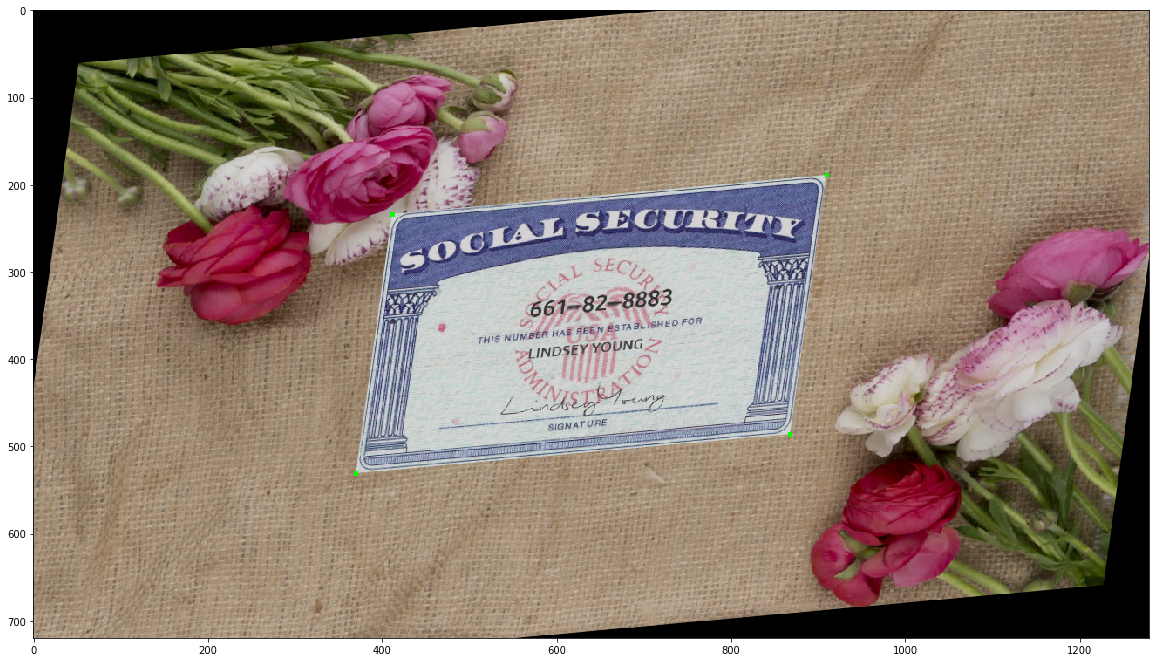

In [16]:
images_aug = seq_det.augment_images([np.array(background_image)])[0]
kp_aug = seq_det.augment_keypoints([keypoints])[0]
plt.figure(figsize=(20,20))
plt.imshow(kp_aug.draw_on_image(images_aug, size=5))
plt.savefig('test.jpg')

## Generate Images

In [27]:
def gen_image(row):
    ssn_template = Image.open('ssn-card-template.jpg')
    draw = ImageDraw.Draw(ssn_template)
    fk = list(fonts.keys())[np.random.randint(1, len(fonts.keys()))]
    f = fonts[fk]
    sign_font = ImageFont.truetype(font='fonts/{}'.format(fk) ,size=f['size'])
    draw.text((340,218), row["SSN"].replace("-","--") , (60, 60, 60), font=ssn_font)
    draw.text((350,330), row["Name"].upper(), (80, 80, 80), font=name_font)
    draw.text((f['x'],f['y']), row["Name"].replace(" ",""), (80, 80, 80), font=sign_font)
    ssn_template = ssn_template.resize((imw, imh))
     
    background_fname = random.choice(os.listdir('background/'))
    background_image = Image.open('background/{}'.format(background_fname))
    background_image = background_image.resize((bw, bh))
    background_image.paste(ssn_template, offset)
    background_image.convert('RGB').save('/newvolume/DATASETS/ssn_data/images_v3/{}.jpeg'.format(row['SSN']))

In [29]:
ssn_font = ImageFont.truetype(font='/home/jarvis/Downloads/Ubuntu-Medium.ttf',size=50)
name_font = ImageFont.truetype(font='/home/jarvis/Downloads/Ubuntu-Medium.ttf',size=32)
imw, imh = 500, 300
bw, bh = 1280,720
offset = ((bw - imw) // 2, (bh - imh) // 2)
_ = Parallel(n_jobs=multiprocessing.cpu_count(),verbose=1)(delayed(gen_image)(row) for _,row in df.iterrows())

[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 688 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 1688 tasks      | elapsed:   19.8s
[Parallel(n_jobs=8)]: Done 3088 tasks      | elapsed:   35.4s
[Parallel(n_jobs=8)]: Done 4888 tasks      | elapsed:   55.6s
[Parallel(n_jobs=8)]: Done 5000 out of 5000 | elapsed:   56.9s finished
